### 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston['data']
data.shape

(506, 13)

In [4]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(boston["DESCR"])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
target = boston['target']

In [7]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score( y_test, y_pred)

0.7112260057484973

### 2

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

In [17]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [18]:
y_pred_2 = model.predict(X_test)

In [19]:
r2_score(y_test, y_pred_2)

0.87472606157312

### в данном случае вторая модель работает лучше

### 3

In [20]:
help(RandomForestRegressor)


Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [21]:
coef = pd.Series(model.feature_importances_, index=X_test.columns)

In [22]:
import matplotlib
%matplotlib inline

<AxesSubplot:>

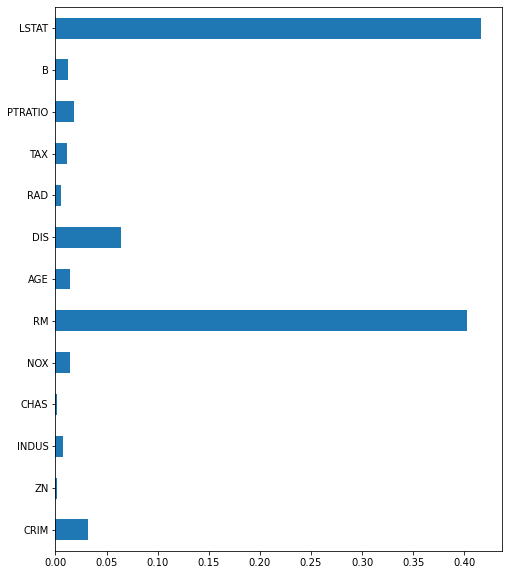

In [23]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")

### 4

In [39]:
df = pd.read_csv ('C:/Users/HP/Downloads/creditcard.csv') 
df.head()

PermissionError: [Errno 13] Permission denied: 'C:/Users/HP/Downloads/creditcard.csv'

### 5

In [ ]:
from sklearn.datasets import load_wine 

In [ ]:
data = load_wine()

In [ ]:
data.keys()

In [ ]:
data_keys=data["feature_names"]


In [ ]:
print(data["DESCR"])

In [ ]:
print(data["target_names"])

In [ ]:
np.unique(data["target"]).shape

In [ ]:
x = pd.DataFrame(data.data, columns=feature_names)

In [ ]:
x.info()

In [ ]:
x.shape

In [ ]:
x['target'] = data["target"].astype(np.int64)
x.info()

In [ ]:
x_corr=x.corr()
x_corr

In [ ]:
high_corr = x_corr["target"]
high_corr = high_corr[np.abs(high_corr)>0.5].drop("target", axis=0)
high_corr=list(high_corr.index)
high_corr

In [ ]:
x=x.drop("target", axis=1)

In [ ]:
for i in high_corr:
 x[i+"_2"]=x[i]**2
x.head()